In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

In [21]:
# ---------------------- Fonction pour afficher la matrice de confusion ----------------------
def plot_confusion_matrix(y_test, y_pred, labels):
    """
    Affiche la matrice de confusion avec des couleurs allant de bleu (peu d'erreurs) à rouge (beaucoup d'erreurs).
    Les valeurs correctes sur la diagonale ne sont pas colorées.

    Paramètres :
        y_test (array) : les labels réels
        y_pred (array) : les prédictions
        labels (array) : les noms des classes
    """
    cm = confusion_matrix(y_test, y_pred)
    normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Masquer les valeurs correctes sur la diagonale
    errors_only = normalized_cm.copy()
    np.fill_diagonal(errors_only, 0)

    # Tracer la matrice de confusion
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="coolwarm",
        cbar=False,
        linewidths=0.5,
        linecolor="black",
        annot_kws={"fontsize": 10},
        mask=(errors_only == 0),
        alpha=0.8
    )
    plt.title("Matrice de confusion", fontsize=16)
    plt.xlabel("Prédictions", fontsize=12)
    plt.ylabel("Réel", fontsize=12)
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=labels))

In [22]:
def train_and_plot_loss(X_train, y_train, hidden_layer_sizes=(256, 128, 64, 32, 16, 10), max_iter=100, random_state=42):
    """
    Entraîne un modèle MLPClassifier et affiche la courbe des pertes.

    Paramètres :
        X_train            (array) : les données d'entraînement
        y_train            (array) : les labels des données d'entraînement
        hidden_layer_sizes (list) : structure et nombres des couches cachées
        max_iter           (int) : nombre maximum d'itérations
        random_state       (int) : valeur aléatoire pour la reproductibilité

    Retourne :
        mlp : le modèle entraîné
    """
    print("Construction et entraînement du modèle...")
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation='relu',
        solver='adam',
        max_iter=max_iter,
        random_state=random_state,
        verbose=True
    )
    mlp.fit(X_train, y_train)

    # Courbe des pertes
    loss_curve = mlp.loss_curve_
    plt.plot(loss_curve, marker='o', linestyle='-', color='b')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Évolution de la perte durant l\'entraînement')
    plt.grid(True)
    plt.show()

    return mlp

In [23]:
# ---------------------- Fonction pour visualiser les prédictions ----------------------
def plot_predictions(X_test, y_test, y_pred):
    """
    Affiche un échantillon des images de test avec leurs valeurs réelles et prédites.

    Paramètres :
        X_test (array) : les données de test
        y_test (array) : les labels réels
        y_pred (array) : les prédictions
    """
    print("Affichage des prédictions...")
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Vrai: {y_test[i]} | Prédit: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Chargement des données...
Construction et entraînement du modèle...
Iteration 1, loss = 0.67292410
Iteration 2, loss = 0.16826965
Iteration 3, loss = 0.10172537
Iteration 4, loss = 0.06579596
Iteration 5, loss = 0.04805729
Iteration 6, loss = 0.03394052
Iteration 7, loss = 0.02021966
Iteration 8, loss = 0.02285569
Iteration 9, loss = 0.02769556
Iteration 10, loss = 0.02762297
Iteration 11, loss = 0.02227894
Iteration 12, loss = 0.01806161
Iteration 13, loss = 0.01986809
Iteration 14, loss = 0.01123869
Iteration 15, loss = 0.00681358
Iteration 16, loss = 0.01027332
Iteration 17, loss = 0.01475449
Iteration 18, loss = 0.02697770
Iteration 19, loss = 0.02250033
Iteration 20, loss = 0.01400271
Iteration 21, loss = 0.00627889
Iteration 22, loss = 0.00429756
Iteration 23, loss = 0.00203012
Iteration 24, loss = 0.00064849
Iteration 25, loss = 0.00046349
Iteration 26, loss = 0.00042561
Iteration 27, loss = 0.00040006
Iteration 28, loss = 0.00038617
Iteration 29, loss = 0.00037612
Iteration 30,

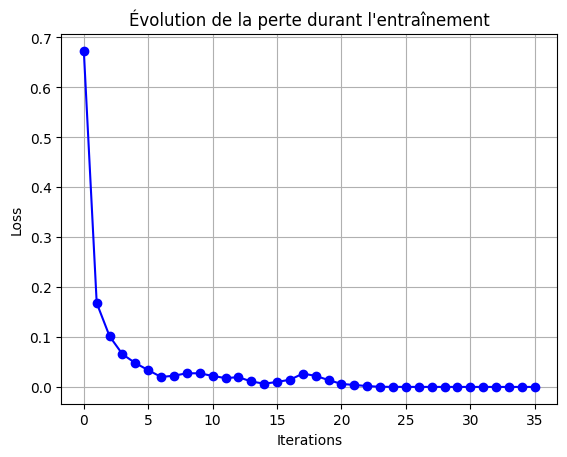

Évaluation des performances...
Précision du modèle : 0.9719


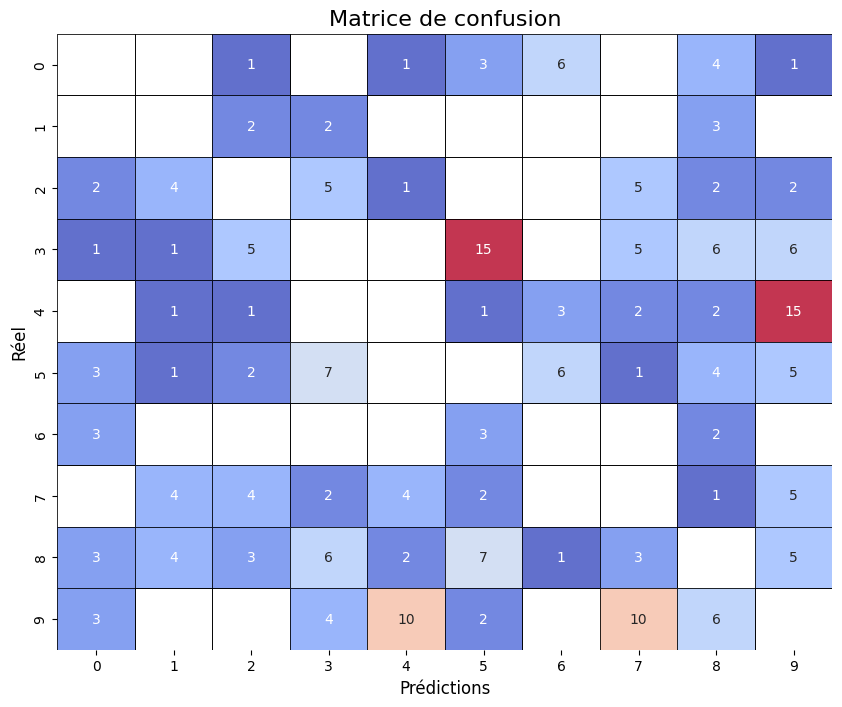


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.98      0.99      0.99       937
           2       0.98      0.97      0.98       835
           3       0.97      0.96      0.96       870
           4       0.98      0.97      0.97       814
           5       0.96      0.96      0.96       759
           6       0.98      0.99      0.99       827
           7       0.97      0.97      0.97       880
           8       0.96      0.96      0.96       813
           9       0.95      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Affichage des prédictions...


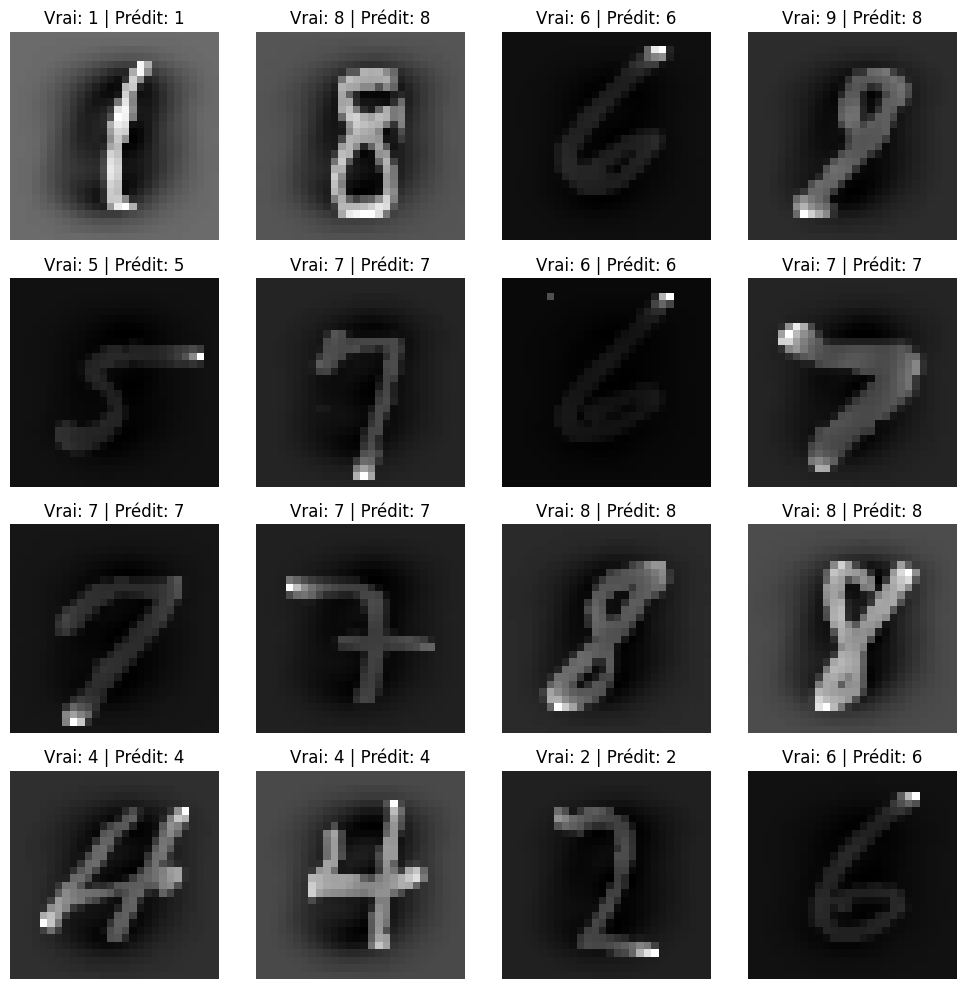

Chargement des données de test...
Prédiction sur les données de test...
Prédictions sauvegardées dans 'submission.csv'


In [24]:
# ---------------------- Programme principal ----------------------
# Charger les données
print("Chargement des données...")
data = pd.read_csv('train.csv')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le modèle
mlp = train_and_plot_loss(X_train, y_train)

# Évaluer le modèle
print("Évaluation des performances...")
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")

# Afficher la matrice de confusion
plot_confusion_matrix(y_test, y_pred, labels=[str(i) for i in range(10)])

# Afficher les prédictions
plot_predictions(X_test, y_test, y_pred)

# ---------------------- Prédiction sur les données de test ----------------------
# Charger les données de test
print("Chargement des données de test...")
test_data = pd.read_csv('test.csv')
X_submission = test_data.values

# Standardiser les données
X_submission = scaler.transform(X_submission)

# Prédire les labels pour les données de test
print("Prédiction sur les données de test...")
y_submission = mlp.predict(X_submission)

# Créer un DataFrame avec les prédictions
submission = pd.DataFrame({'ImageId': range(1, len(y_submission) + 1), 'Label': y_submission})
submission.to_csv('submission.csv', index=False)
print("Prédictions sauvegardées dans 'submission.csv'")



--- Entraînement avec architecture : 10 ---
Construction et entraînement du modèle...
Iteration 1, loss = 1.02393267
Iteration 2, loss = 0.41447297
Iteration 3, loss = 0.33048654
Iteration 4, loss = 0.29195230
Iteration 5, loss = 0.26818000
Iteration 6, loss = 0.25115952
Iteration 7, loss = 0.23856646
Iteration 8, loss = 0.22858577
Iteration 9, loss = 0.22076800
Iteration 10, loss = 0.21426962
Iteration 11, loss = 0.20798398
Iteration 12, loss = 0.20304719
Iteration 13, loss = 0.19794115
Iteration 14, loss = 0.19383960
Iteration 15, loss = 0.18958651
Iteration 16, loss = 0.18624590
Iteration 17, loss = 0.18288651
Iteration 18, loss = 0.18009358
Iteration 19, loss = 0.17756710
Iteration 20, loss = 0.17448638
Iteration 21, loss = 0.17242849
Iteration 22, loss = 0.16976364
Iteration 23, loss = 0.16706419
Iteration 24, loss = 0.16562969
Iteration 25, loss = 0.16348835
Iteration 26, loss = 0.16128456
Iteration 27, loss = 0.15982028
Iteration 28, loss = 0.15734787
Iteration 29, loss = 0.15

f:\Github\Cours\2024-2025\IA\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


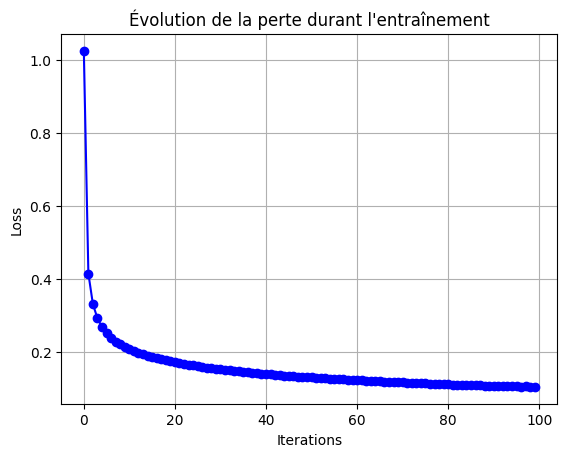

Précision du modèle avec architecture 10 : 0.9168


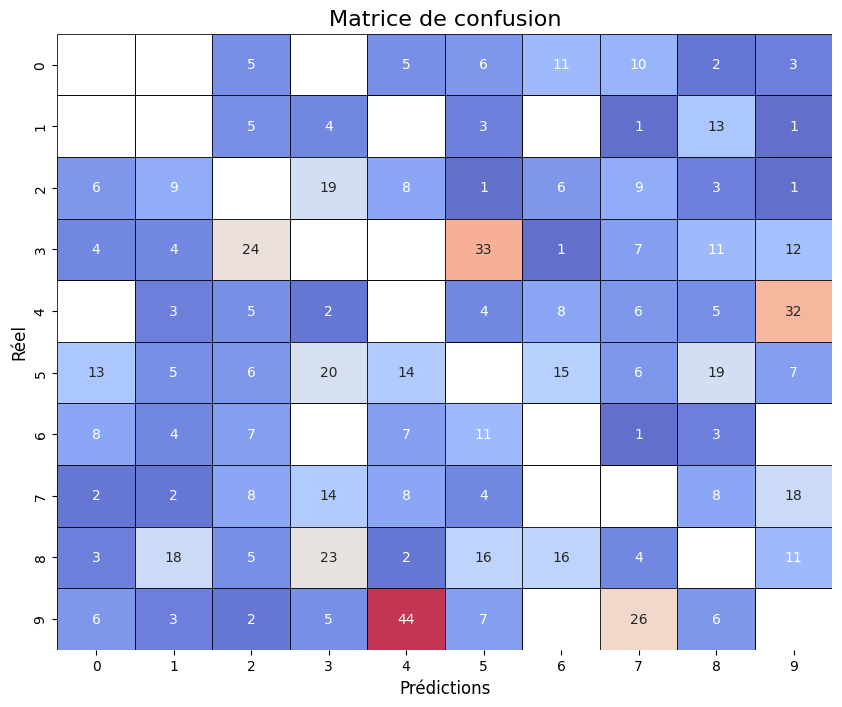


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       827
           1       0.95      0.97      0.96       937
           2       0.92      0.93      0.92       835
           3       0.90      0.89      0.89       870
           4       0.89      0.92      0.91       814
           5       0.88      0.86      0.87       759
           6       0.93      0.95      0.94       827
           7       0.92      0.93      0.92       880
           8       0.91      0.88      0.89       813
           9       0.90      0.88      0.89       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



--- Entraînement avec architecture : (16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 1.16430918
Iteration 2, loss = 0.40397544
Iteration 3, loss = 0.29999692
Iteration 4, loss = 0.25073318

f:\Github\Cours\2024-2025\IA\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


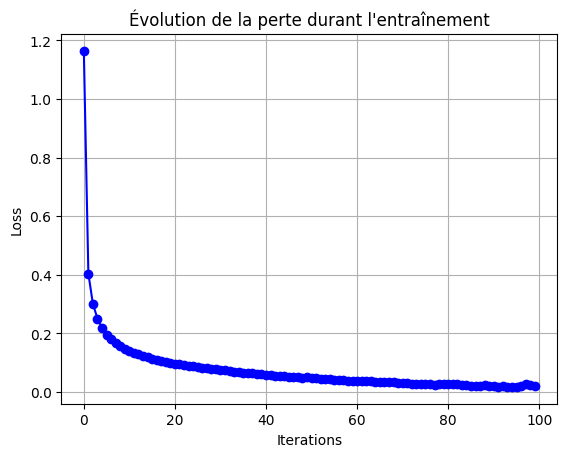

Précision du modèle avec architecture (16, 10) : 0.9318


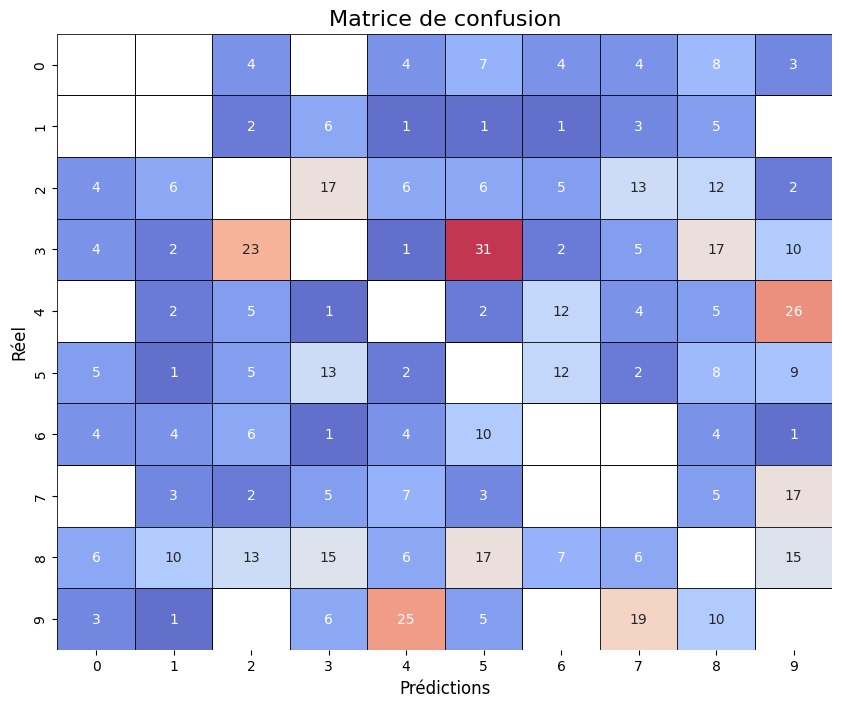


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       827
           1       0.97      0.98      0.97       937
           2       0.93      0.91      0.92       835
           3       0.92      0.89      0.91       870
           4       0.93      0.93      0.93       814
           5       0.90      0.92      0.91       759
           6       0.95      0.96      0.95       827
           7       0.94      0.95      0.94       880
           8       0.91      0.88      0.89       813
           9       0.90      0.92      0.91       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



--- Entraînement avec architecture : (32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 0.99617781
Iteration 2, loss = 0.29028814
Iteration 3, loss = 0.20442631
Iteration 4, loss = 0.1635

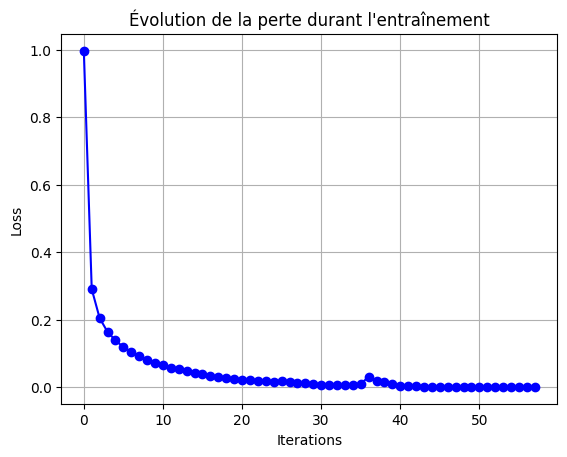

Précision du modèle avec architecture (32, 16, 10) : 0.9507


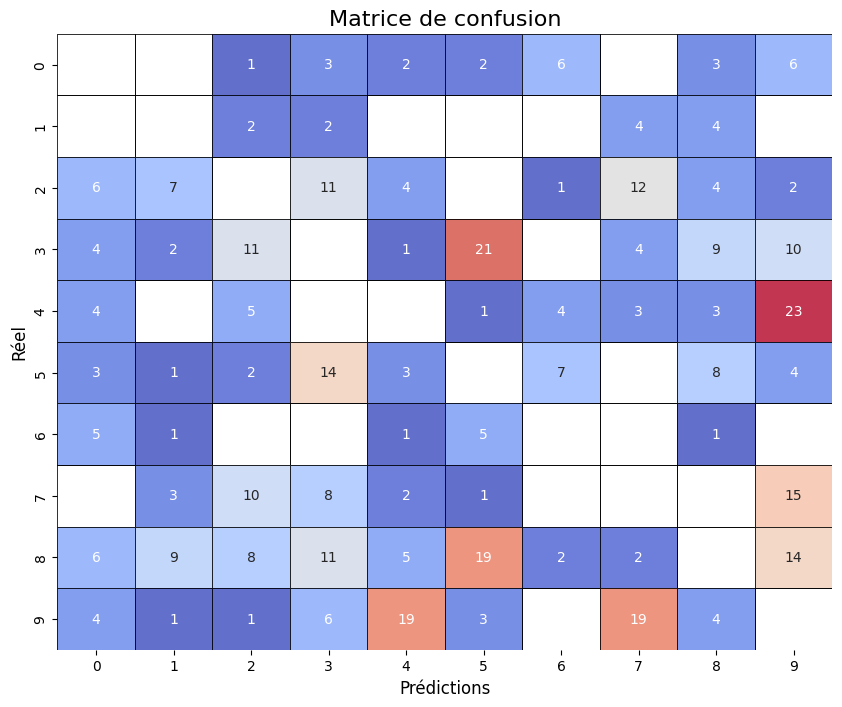


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       827
           1       0.97      0.99      0.98       937
           2       0.95      0.94      0.95       835
           3       0.94      0.93      0.93       870
           4       0.95      0.95      0.95       814
           5       0.93      0.94      0.94       759
           6       0.98      0.98      0.98       827
           7       0.95      0.96      0.95       880
           8       0.95      0.91      0.93       813
           9       0.91      0.93      0.92       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



--- Entraînement avec architecture : (64, 32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 1.27767499
Iteration 2, loss = 0.26945074
Iteration 3, loss = 0.17143489
Iteration 4, loss = 0.

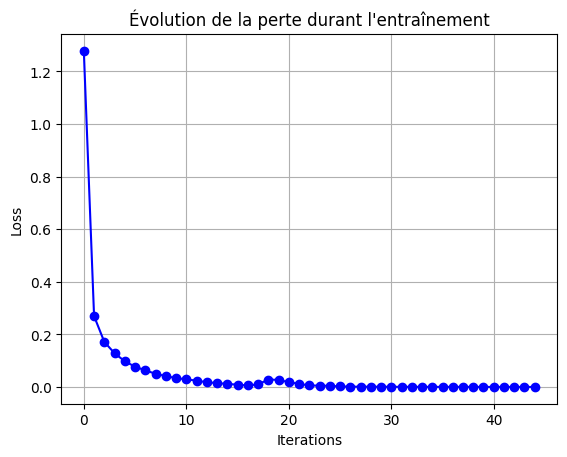

Précision du modèle avec architecture (64, 32, 16, 10) : 0.9626


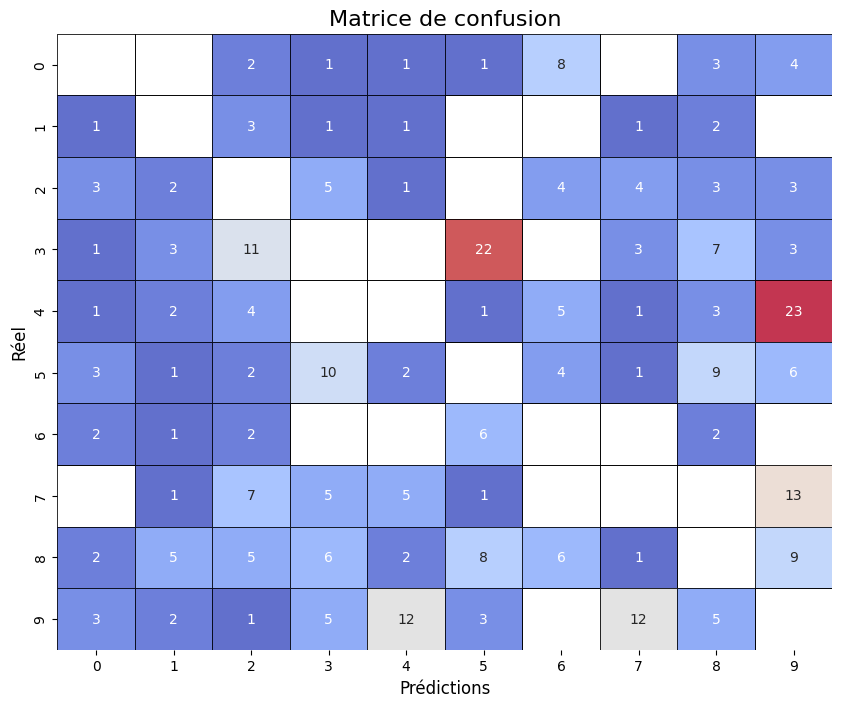


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.98      0.99      0.99       937
           2       0.96      0.97      0.96       835
           3       0.96      0.94      0.95       870
           4       0.97      0.95      0.96       814
           5       0.94      0.95      0.95       759
           6       0.97      0.98      0.98       827
           7       0.97      0.96      0.97       880
           8       0.96      0.95      0.95       813
           9       0.93      0.95      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



--- Entraînement avec architecture : (128, 64, 32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 0.69041996
Iteration 2, loss = 0.17307296
Iteration 3, loss = 0.11113910
Iteration 4, loss

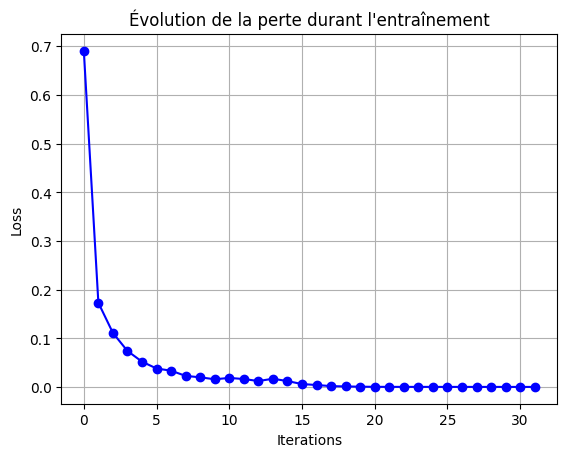

Précision du modèle avec architecture (128, 64, 32, 16, 10) : 0.9674


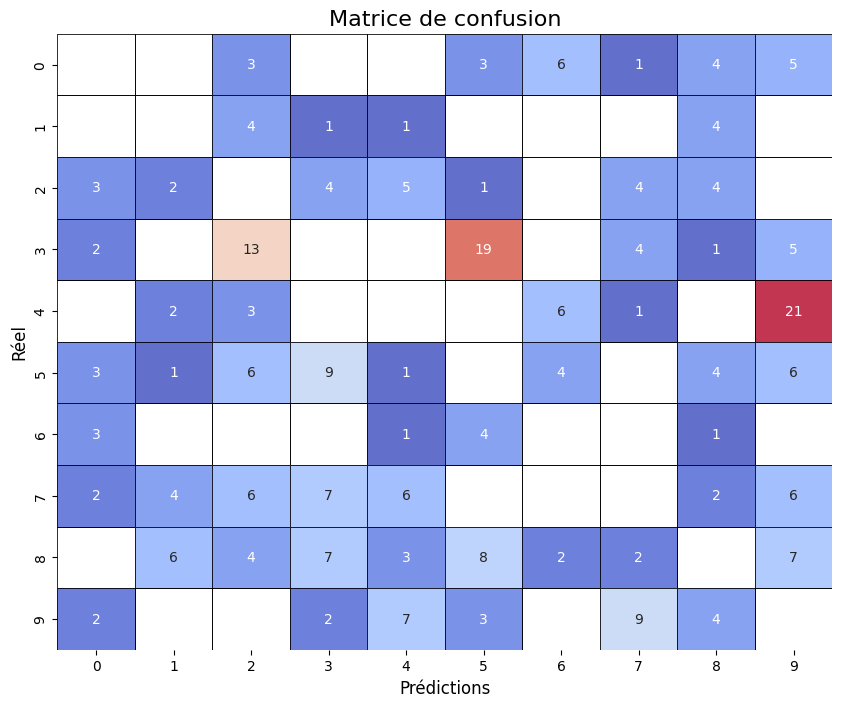


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       827
           1       0.98      0.99      0.99       937
           2       0.95      0.97      0.96       835
           3       0.96      0.95      0.96       870
           4       0.97      0.96      0.96       814
           5       0.95      0.96      0.95       759
           6       0.98      0.99      0.98       827
           7       0.98      0.96      0.97       880
           8       0.97      0.95      0.96       813
           9       0.94      0.97      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



--- Entraînement avec architecture : (256, 128, 64, 32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 0.67292410
Iteration 2, loss = 0.16826965
Iteration 3, loss = 0.10172537
Iteration 4,

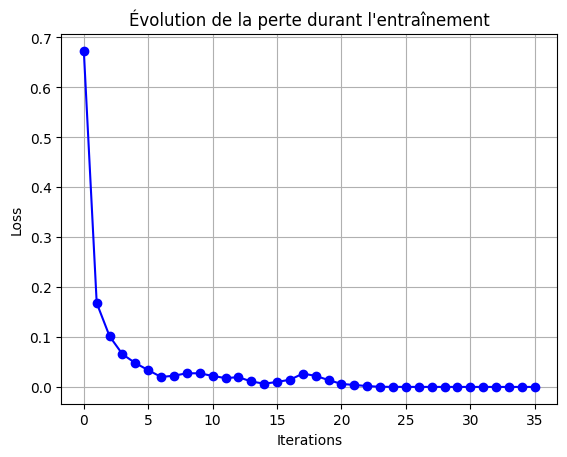

Précision du modèle avec architecture (256, 128, 64, 32, 16, 10) : 0.9719


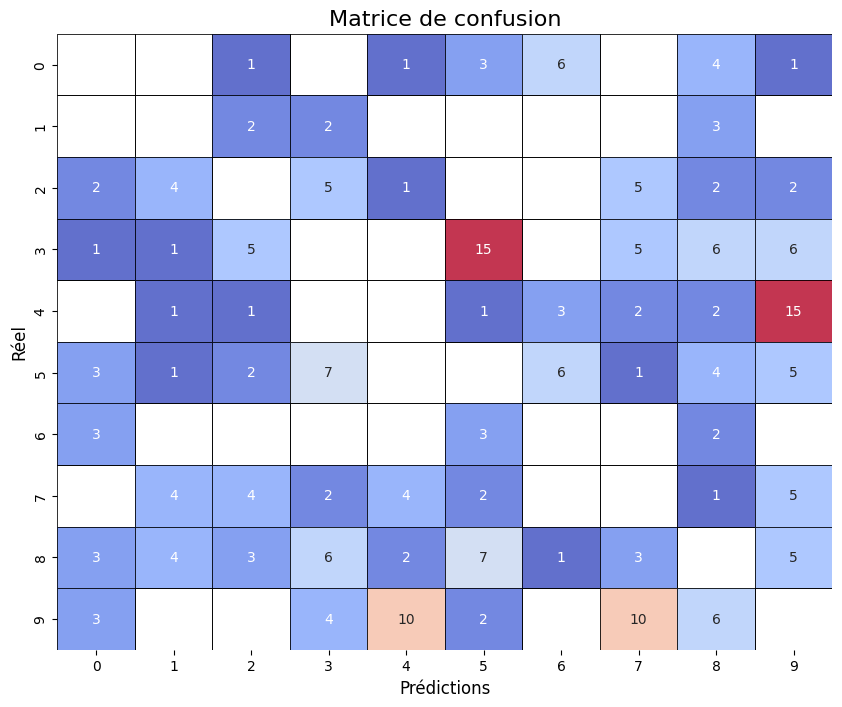


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.98      0.99      0.99       937
           2       0.98      0.97      0.98       835
           3       0.97      0.96      0.96       870
           4       0.98      0.97      0.97       814
           5       0.96      0.96      0.96       759
           6       0.98      0.99      0.99       827
           7       0.97      0.97      0.97       880
           8       0.96      0.96      0.96       813
           9       0.95      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



--- Entraînement avec architecture : (512, 256, 128, 64, 32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 0.72388066
Iteration 2, loss = 0.17793268
Iteration 3, loss = 0.10778948
Iterati

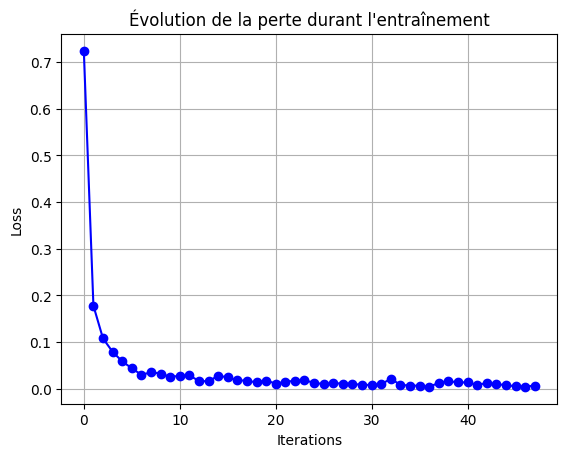

Précision du modèle avec architecture (512, 256, 128, 64, 32, 16, 10) : 0.9694


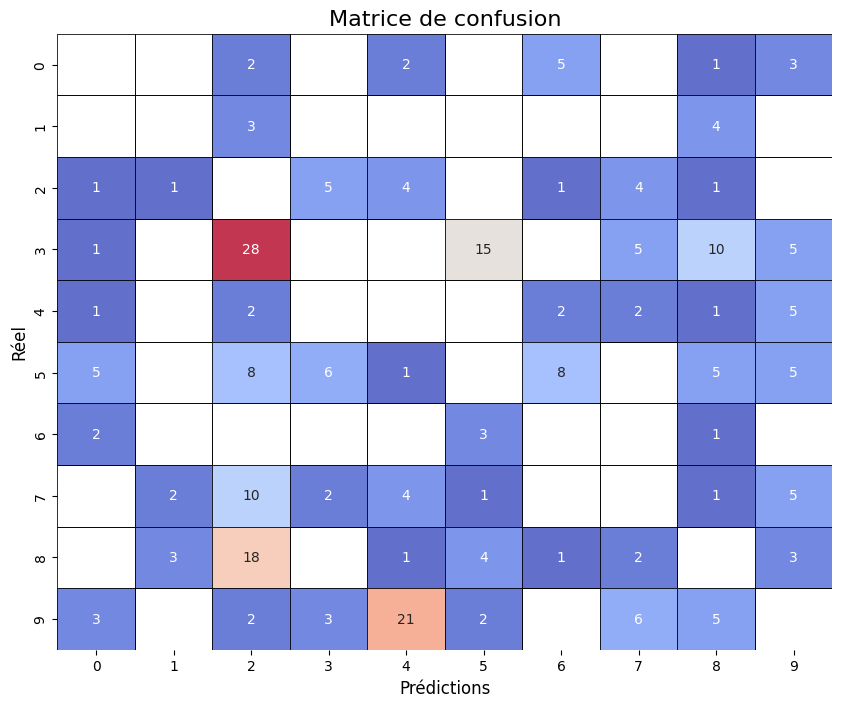


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.99      0.99      0.99       937
           2       0.92      0.98      0.95       835
           3       0.98      0.93      0.95       870
           4       0.96      0.98      0.97       814
           5       0.97      0.95      0.96       759
           6       0.98      0.99      0.99       827
           7       0.98      0.97      0.97       880
           8       0.96      0.96      0.96       813
           9       0.97      0.95      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



--- Entraînement avec architecture : (1024, 512, 256, 128, 64, 32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 0.82780645
Iteration 2, loss = 0.19940268
Iteration 3, loss = 0.12576357
I

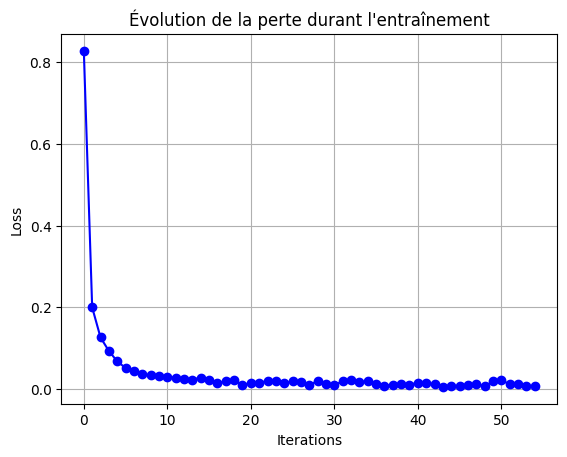

Précision du modèle avec architecture (1024, 512, 256, 128, 64, 32, 16, 10) : 0.9732


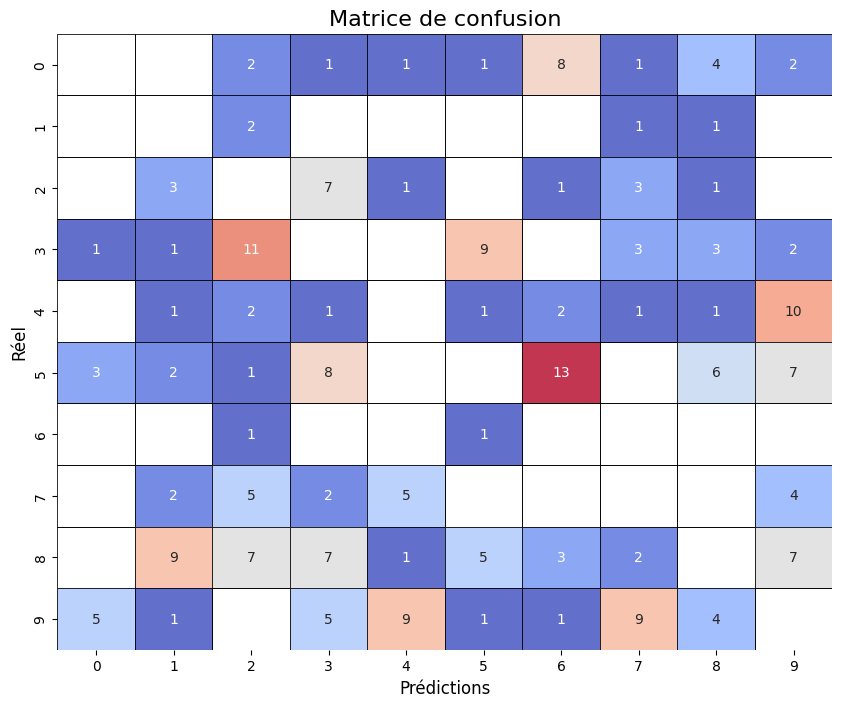


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       827
           1       0.98      1.00      0.99       937
           2       0.96      0.98      0.97       835
           3       0.96      0.97      0.96       870
           4       0.98      0.98      0.98       814
           5       0.98      0.95      0.96       759
           6       0.97      1.00      0.98       827
           7       0.98      0.98      0.98       880
           8       0.97      0.95      0.96       813
           9       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



--- Entraînement avec architecture : (2048, 1024, 512, 256, 128, 64, 32, 16, 10) ---
Construction et entraînement du modèle...
Iteration 1, loss = 0.61464788
Iteration 2, loss = 0.17757472
Iteration 3, loss = 0.1197

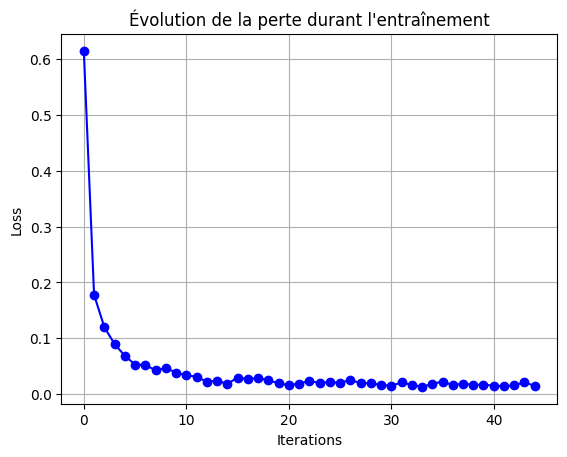

Précision du modèle avec architecture (2048, 1024, 512, 256, 128, 64, 32, 16, 10) : 0.9761


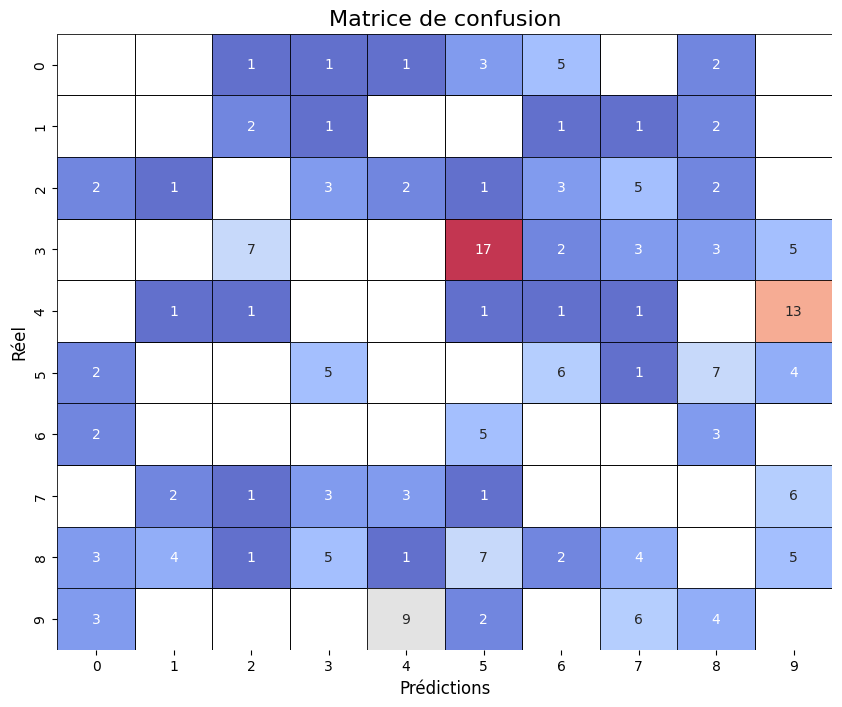


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       827
           1       0.99      0.99      0.99       937
           2       0.98      0.98      0.98       835
           3       0.98      0.96      0.97       870
           4       0.98      0.98      0.98       814
           5       0.95      0.97      0.96       759
           6       0.98      0.99      0.98       827
           7       0.98      0.98      0.98       880
           8       0.97      0.96      0.97       813
           9       0.96      0.97      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



--- Résultats finaux ---
Architecture 10 : précision = 0.9168
Architecture (16, 10) : précision = 0.9318
Architecture (32, 16, 10) : précision = 0.9507
Architecture (64, 32, 16, 10) : précision = 0.9626
Architecture

In [12]:
# ---------------------- Tester différentes architectures ----------------------
# Listes les différentes architectures à tester
architectures = [
    (10), 
    (16, 10),
    (32, 16, 10),
    (64, 32, 16, 10),
    (128, 64, 32, 16, 10),
    (256, 128, 64, 32, 16, 10),
    (512, 256, 128, 64, 32, 16, 10),
    (1024, 512, 256, 128, 64, 32, 16, 10), 
    (2048, 1024, 512, 256, 128, 64, 32, 16, 10)
]

# Stock les résultats obtenus pour chaque architecture
results = []

# Stock la précision pour chaque architecture
accuracy = []

for arch in architectures:
    print(f"\n\n--- Entraînement avec architecture : {arch} ---")
    mlp = train_and_plot_loss(X_train, y_train, hidden_layer_sizes=arch, max_iter=100)

    # Évaluer le modèle
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((arch, accuracy))

    print(f"Précision du modèle avec architecture {arch} : {accuracy:.4f}")
    plot_confusion_matrix(y_test, y_pred, labels=[str(i) for i in range(10)])

# Résumé des résultats
print("\n\n--- Résultats finaux ---")
for arch, acc in results:
    print(f"Architecture {arch} : précision = {acc:.4f}")
    plt.figure(figsize=(10, 6))



--- Affichage des bilans de performance ---


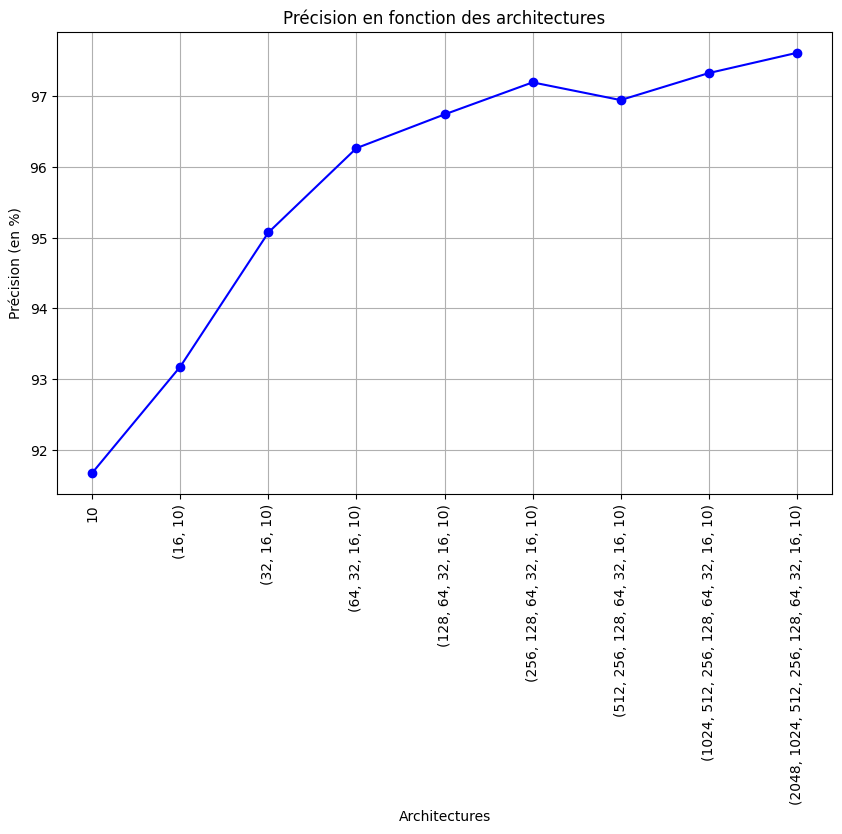

In [19]:
print("\n\n--- Affichage des bilans de performance ---")
plt.figure(figsize=(10, 6))
# Extraire les architectures et les précisions
architectures_str = [str(arch) for arch, _ in results]
precisions = [acc*100 for _, acc in results] 

# Tracer les précisions en fonction des architectures
plt.plot(architectures_str, precisions, marker='o', linestyle='-', color='b')
plt.xlabel('Architectures')
plt.ylabel('Précision (en %)')
plt.title('Précision en fonction des architectures')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()